In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [4]:
data.tail()

loan_id   no_of_dependents      education  self_employed   income_annum  \
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved

In [5]:
data.shape

(4269, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
data[' loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [9]:
np.unique(data[' education'])

array([' Graduate', ' Not Graduate'], dtype=object)

In [10]:
np.unique(data[' self_employed'])

array([' No', ' Yes'], dtype=object)

In [11]:
data = data.drop('loan_id',axis=1)

In [12]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [13]:
data.columns = data.columns.str.strip()

In [14]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [15]:
# Checking for null values
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [16]:
data.nunique()

no_of_dependents              6
education                     2
self_employed                 2
income_annum                 98
loan_amount                 378
loan_term                    10
cibil_score                 601
residential_assets_value    278
commercial_assets_value     188
luxury_assets_value         379
bank_asset_value            146
loan_status                   2
dtype: int64

In [17]:
data = data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [18]:
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = data.select_dtypes(exclude='object').columns
print("Categorical Columns: ",categorical_columns)
print("Numerical_columns: ",numerical_columns)

Categorical Columns:  Index(['education', 'self_employed', 'loan_status'], dtype='object')
Numerical_columns:  Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


In [19]:
for var in categorical_columns: 
    print(data[var].value_counts())

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


# Descriptive Statistics

In [20]:
data.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      4.269000e+03  
mean       4.976692e+06  
std        3.250185e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.470000e+07

In [21]:
data[categorical_columns].describe()

education self_employed loan_status
count       4269          4269        4269
unique         2             2           2
top     Graduate           Yes    Approved
freq        2144          2150        2656

# Data Visualization

In [22]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1138518947.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x = 'loan_status', data = data, palette="Set1")


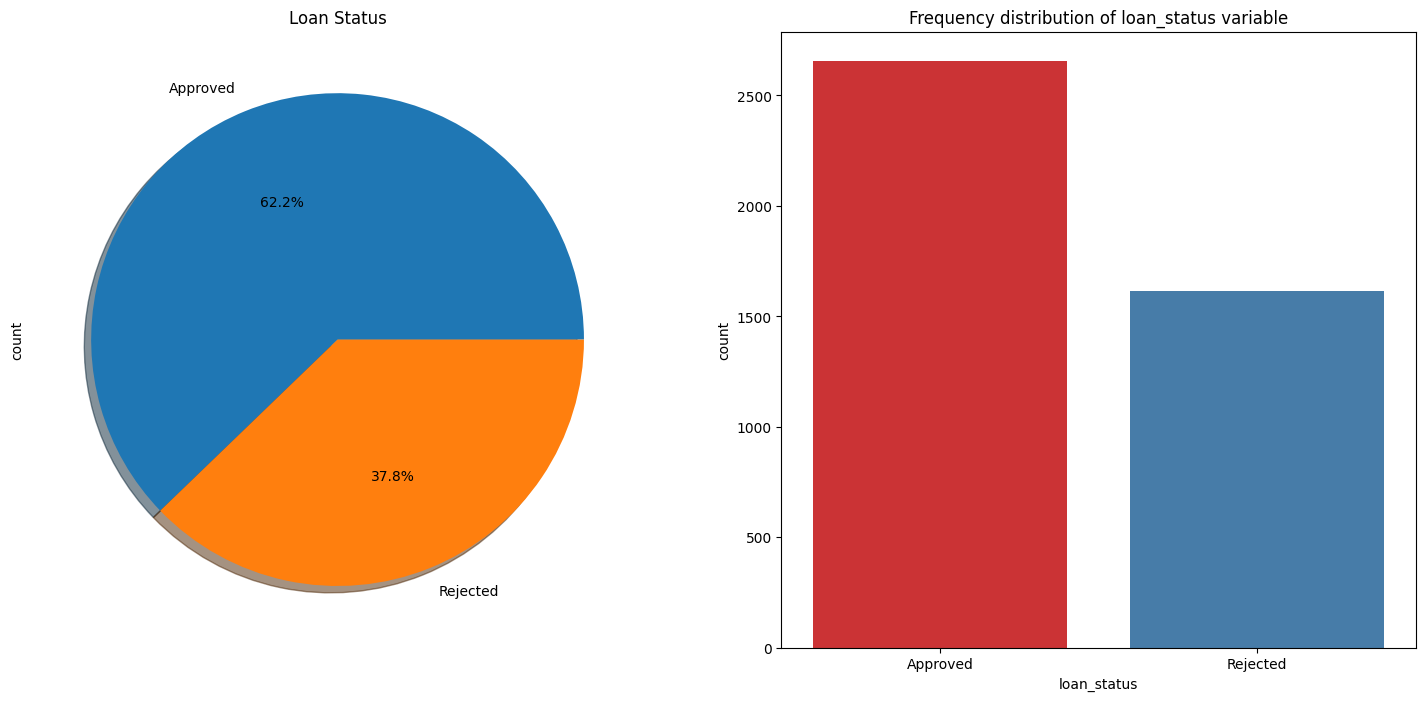

In [24]:
f, ax = plt.subplots(1,2,figsize=(18,8))
ax[0] = data['loan_status'].value_counts().plot.pie(explode=[0,0], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Loan Status')

ax[1] = sns.countplot(x = 'loan_status', data = data, palette="Set1")
ax[1].set_title("Frequency distribution of loan_status variable")

plt.show()

In [25]:
loan_approved = data[data['loan_status'] == 'Approved']
loan_rejected = data[data['loan_status'] == 'Rejected']
print (loan_approved.shape, loan_rejected.shape)

(2656, 12) (1613, 12)


In [26]:
data[categorical_columns]

education self_employed loan_status
0         Graduate            No    Approved
1     Not Graduate           Yes    Rejected
2         Graduate            No    Rejected
3         Graduate            No    Rejected
4     Not Graduate           Yes    Rejected
...            ...           ...         ...
4264      Graduate           Yes    Rejected
4265  Not Graduate           Yes    Approved
4266  Not Graduate            No    Rejected
4267  Not Graduate            No    Approved
4268      Graduate            No    Approved

[4269 rows x 3 columns]

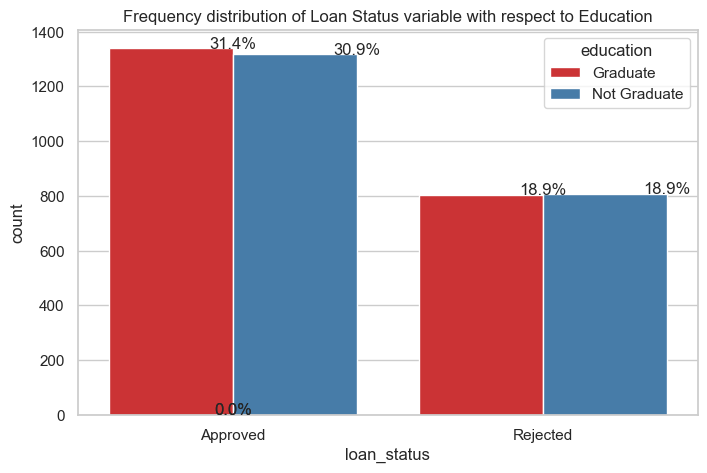

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x = "loan_status", hue = "education", data = data,palette = 'Set1')
ax.set_title("Frequency distribution of Loan Status variable with respect to Education")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Loan Approval and Rejection is almost independent of whether the person applying for loan is a Graduate or Not

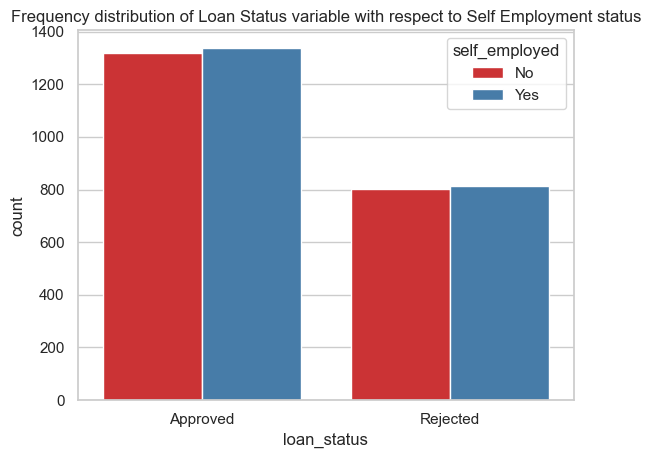

In [28]:
total = float(len(data))
ax = sns.countplot(x = "loan_status", hue = "self_employed", data = data, palette = "Set1")
ax.set_title("Frequency distribution of Loan Status variable with respect to Self Employment status")
plt.show()

Both the Loan Approval and Rejection is slightly higher for Self-employed people when compared to people with no self-employment

# Correlation

In [29]:
data[numerical_columns]

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value  
0              8000000  
1              3300000  
2             12800000  
3              7900000  
4              5000000  
...                ...  
4264            800000  
4265           1900000  
4266           7300000  
4267           5800000  
4268          12000000  

[4269 rows x 9 columns]

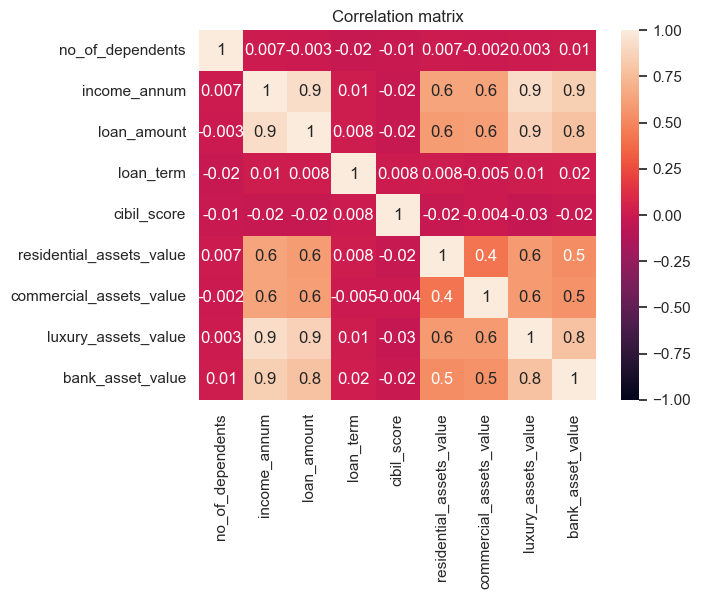

In [30]:
# Correlation
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, vmax = 1.0, vmin = -1.0, fmt = '.1g', annot = True)
plt.title('Correlation matrix')
plt.show()

# Handling Outliers

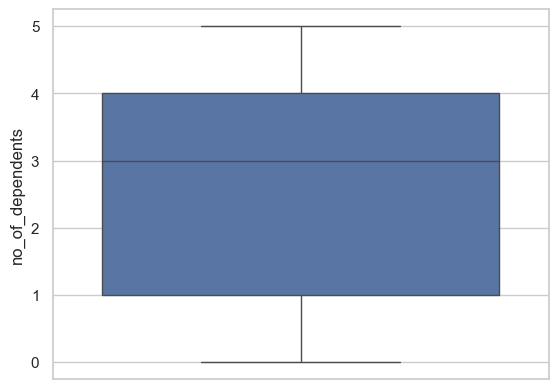

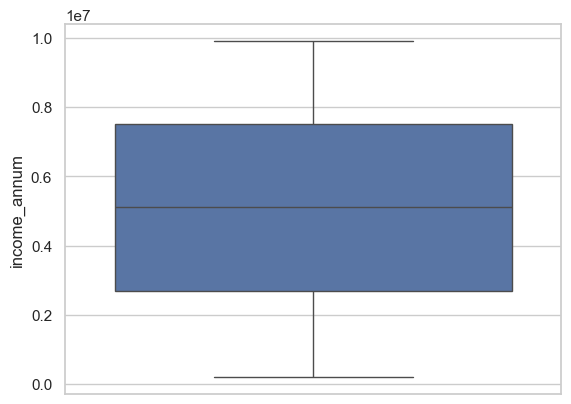

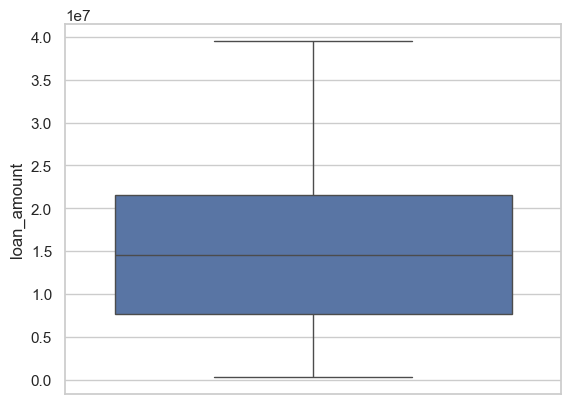

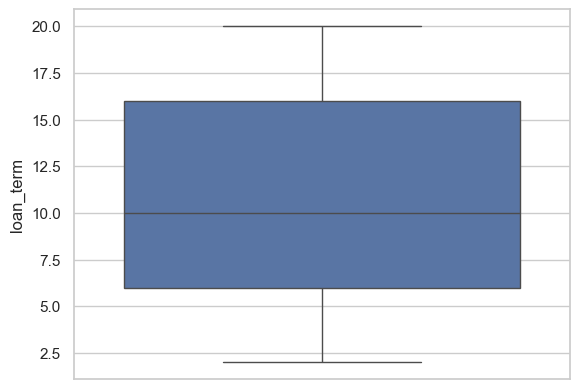

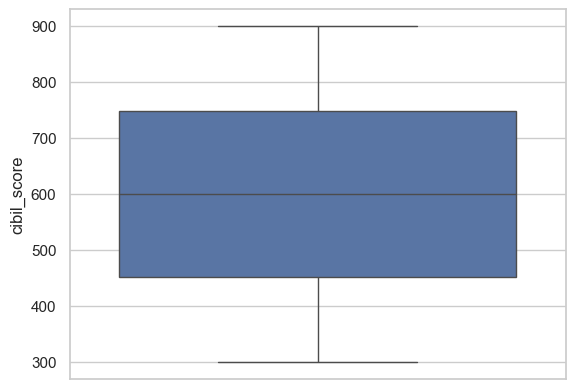

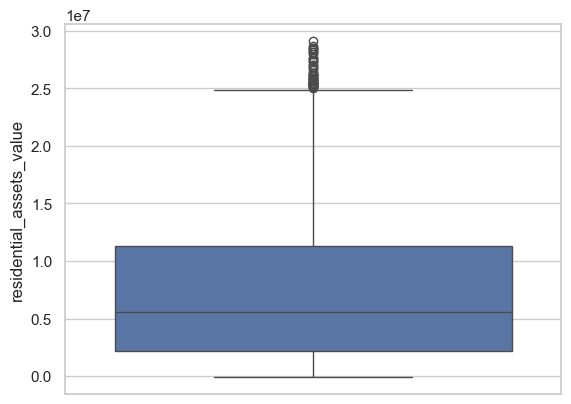

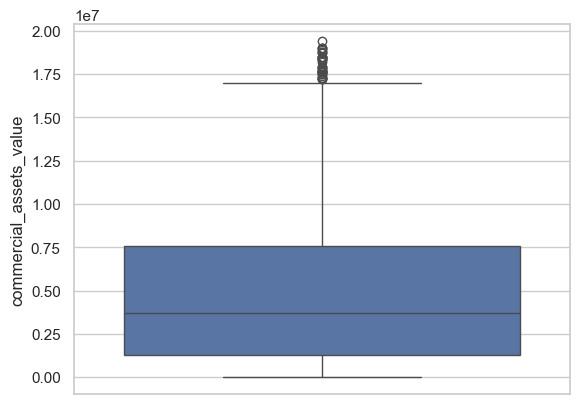

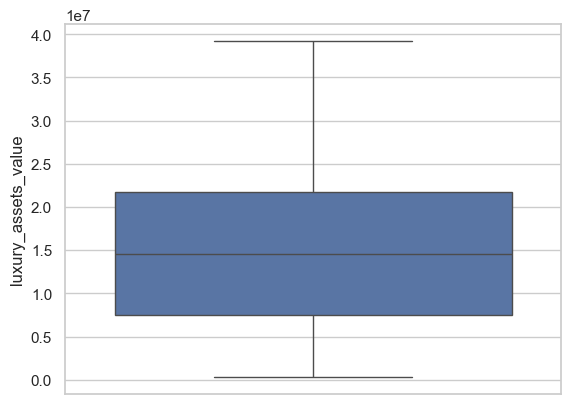

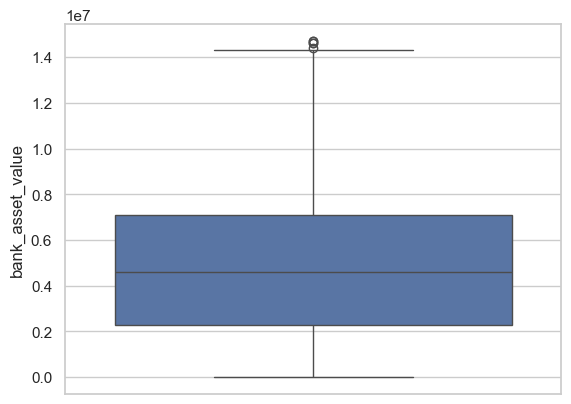

In [31]:
for column in numerical_columns:
    sns.boxplot(data[column])
    plt.show()

In [32]:
data.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  
count      4.269000e+03  
mean       4.976692e+06  
std        3.250185e+06  
min        0.000000e+00  
25%        2.300000e+06  
50%        4.600000e+06  
75%        7.100000e+06  
max        1.470000e+07

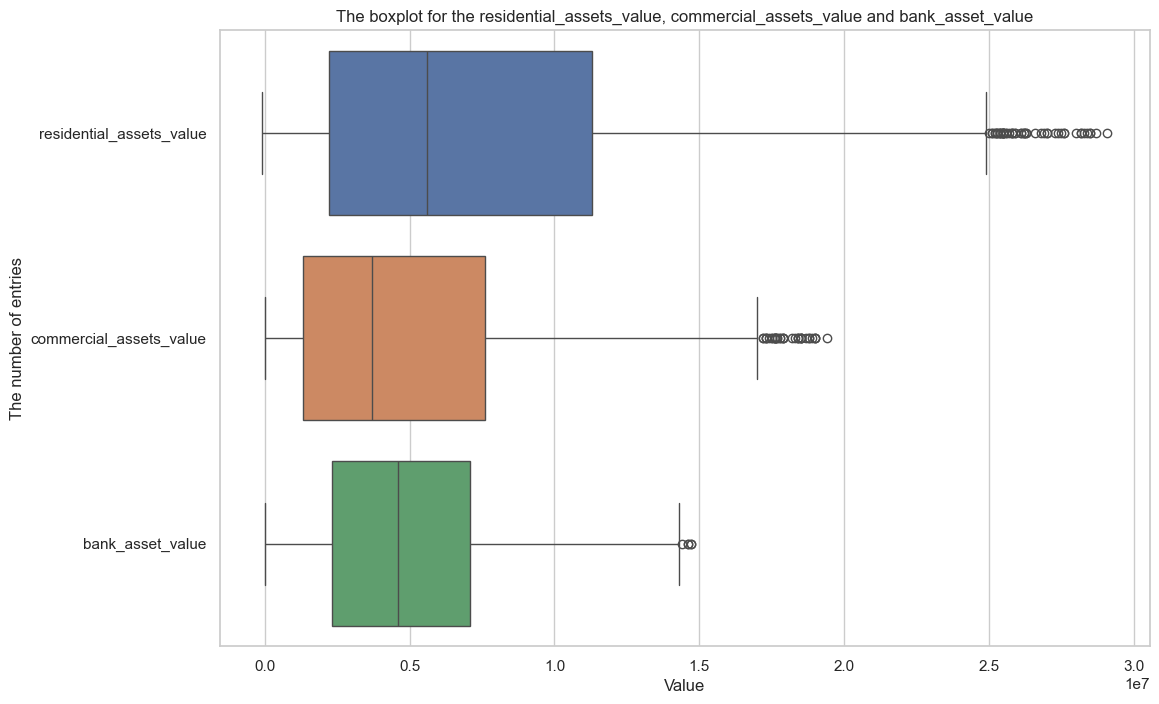

In [33]:
plt.figure(figsize=(12,8))
plt.title('The boxplot for the residential_assets_value, commercial_assets_value and bank_asset_value')
sns.boxplot( data = data[['residential_assets_value','commercial_assets_value','bank_asset_value']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Value')
plt.show()

In [34]:
'''# Outliers Removal
# Store original index to preserve data alignment
data['Index'] = data.index'''

"# Outliers Removal\n# Store original index to preserve data alignment\ndata['Index'] = data.index"

In [35]:
'''def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

data_cleaned = remove_outliers_iqr(data[numerical_columns])'''

'def remove_outliers_iqr(data):\n    Q1 = data.quantile(0.25)\n    Q3 = data.quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]\n\ndata_cleaned = remove_outliers_iqr(data[numerical_columns])'

In [36]:
#data_cleaned

In [37]:
# Select only the valid indices from original dataset to retain text columns
#data_complete = data.loc[data_cleaned.index]

In [38]:
# Reset index for a Clean Dataset
#data_complete = data_complete.reset_index(drop=True)

In [39]:
#data_complete

# Distribution of data

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


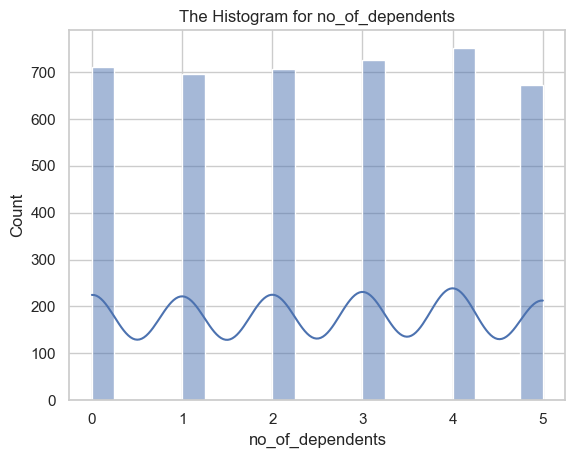

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


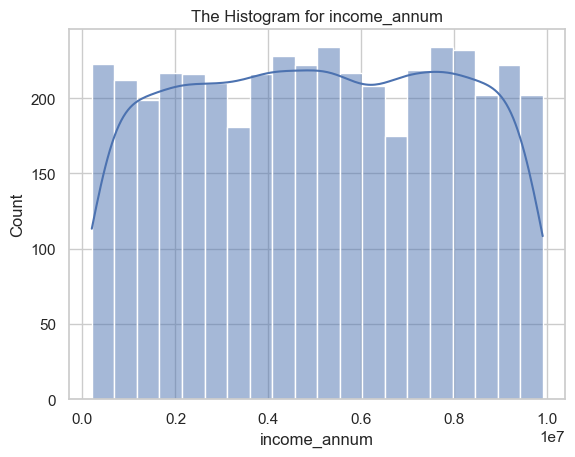

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


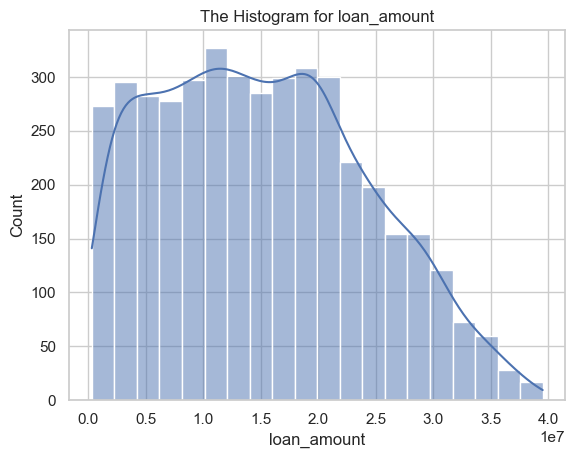

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


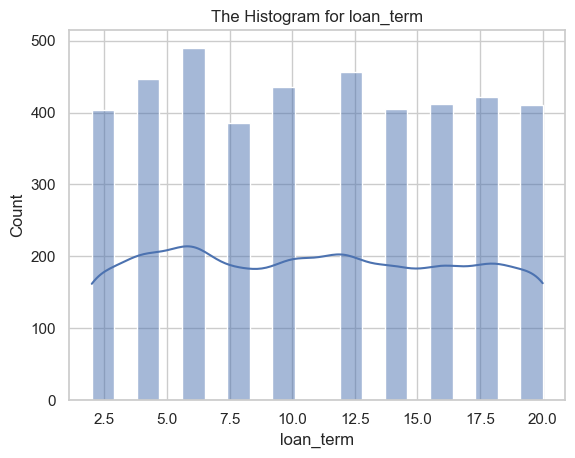

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


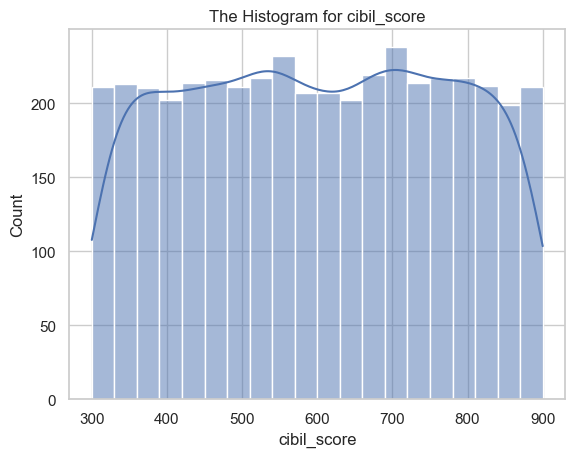

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


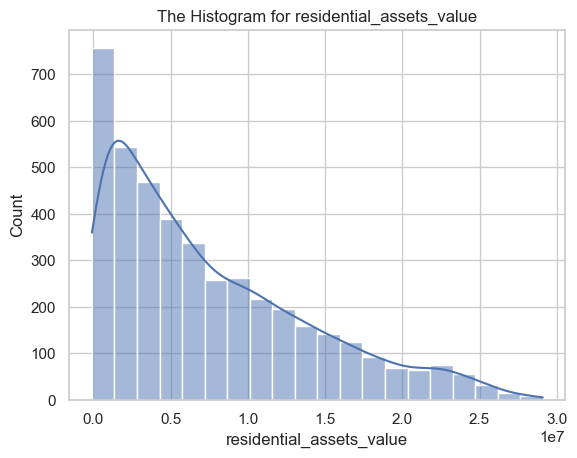

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


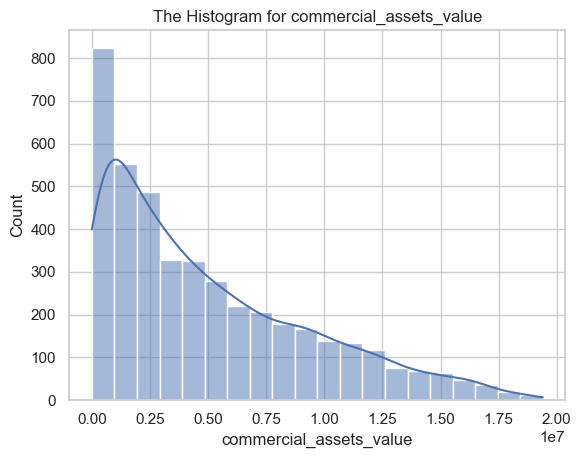

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


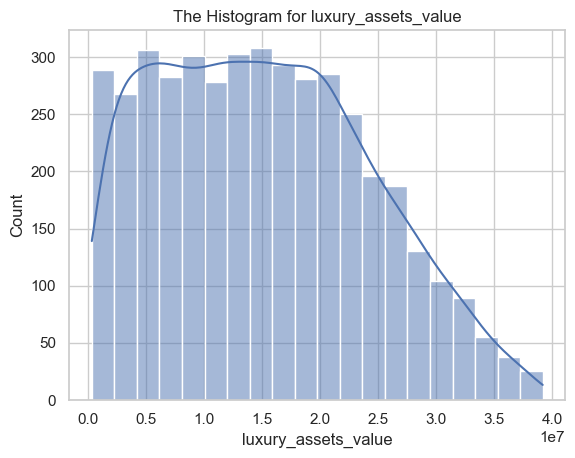

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1617984827.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)


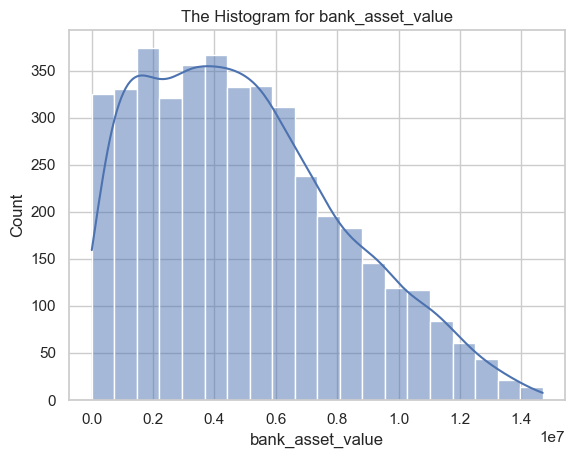

In [40]:
for i in numerical_columns:
    sns.histplot(x = data[i], palette = 'Set1', bins = 20, kde = True)
    plt.title("The Histogram for {}".format(i))
    plt.show()

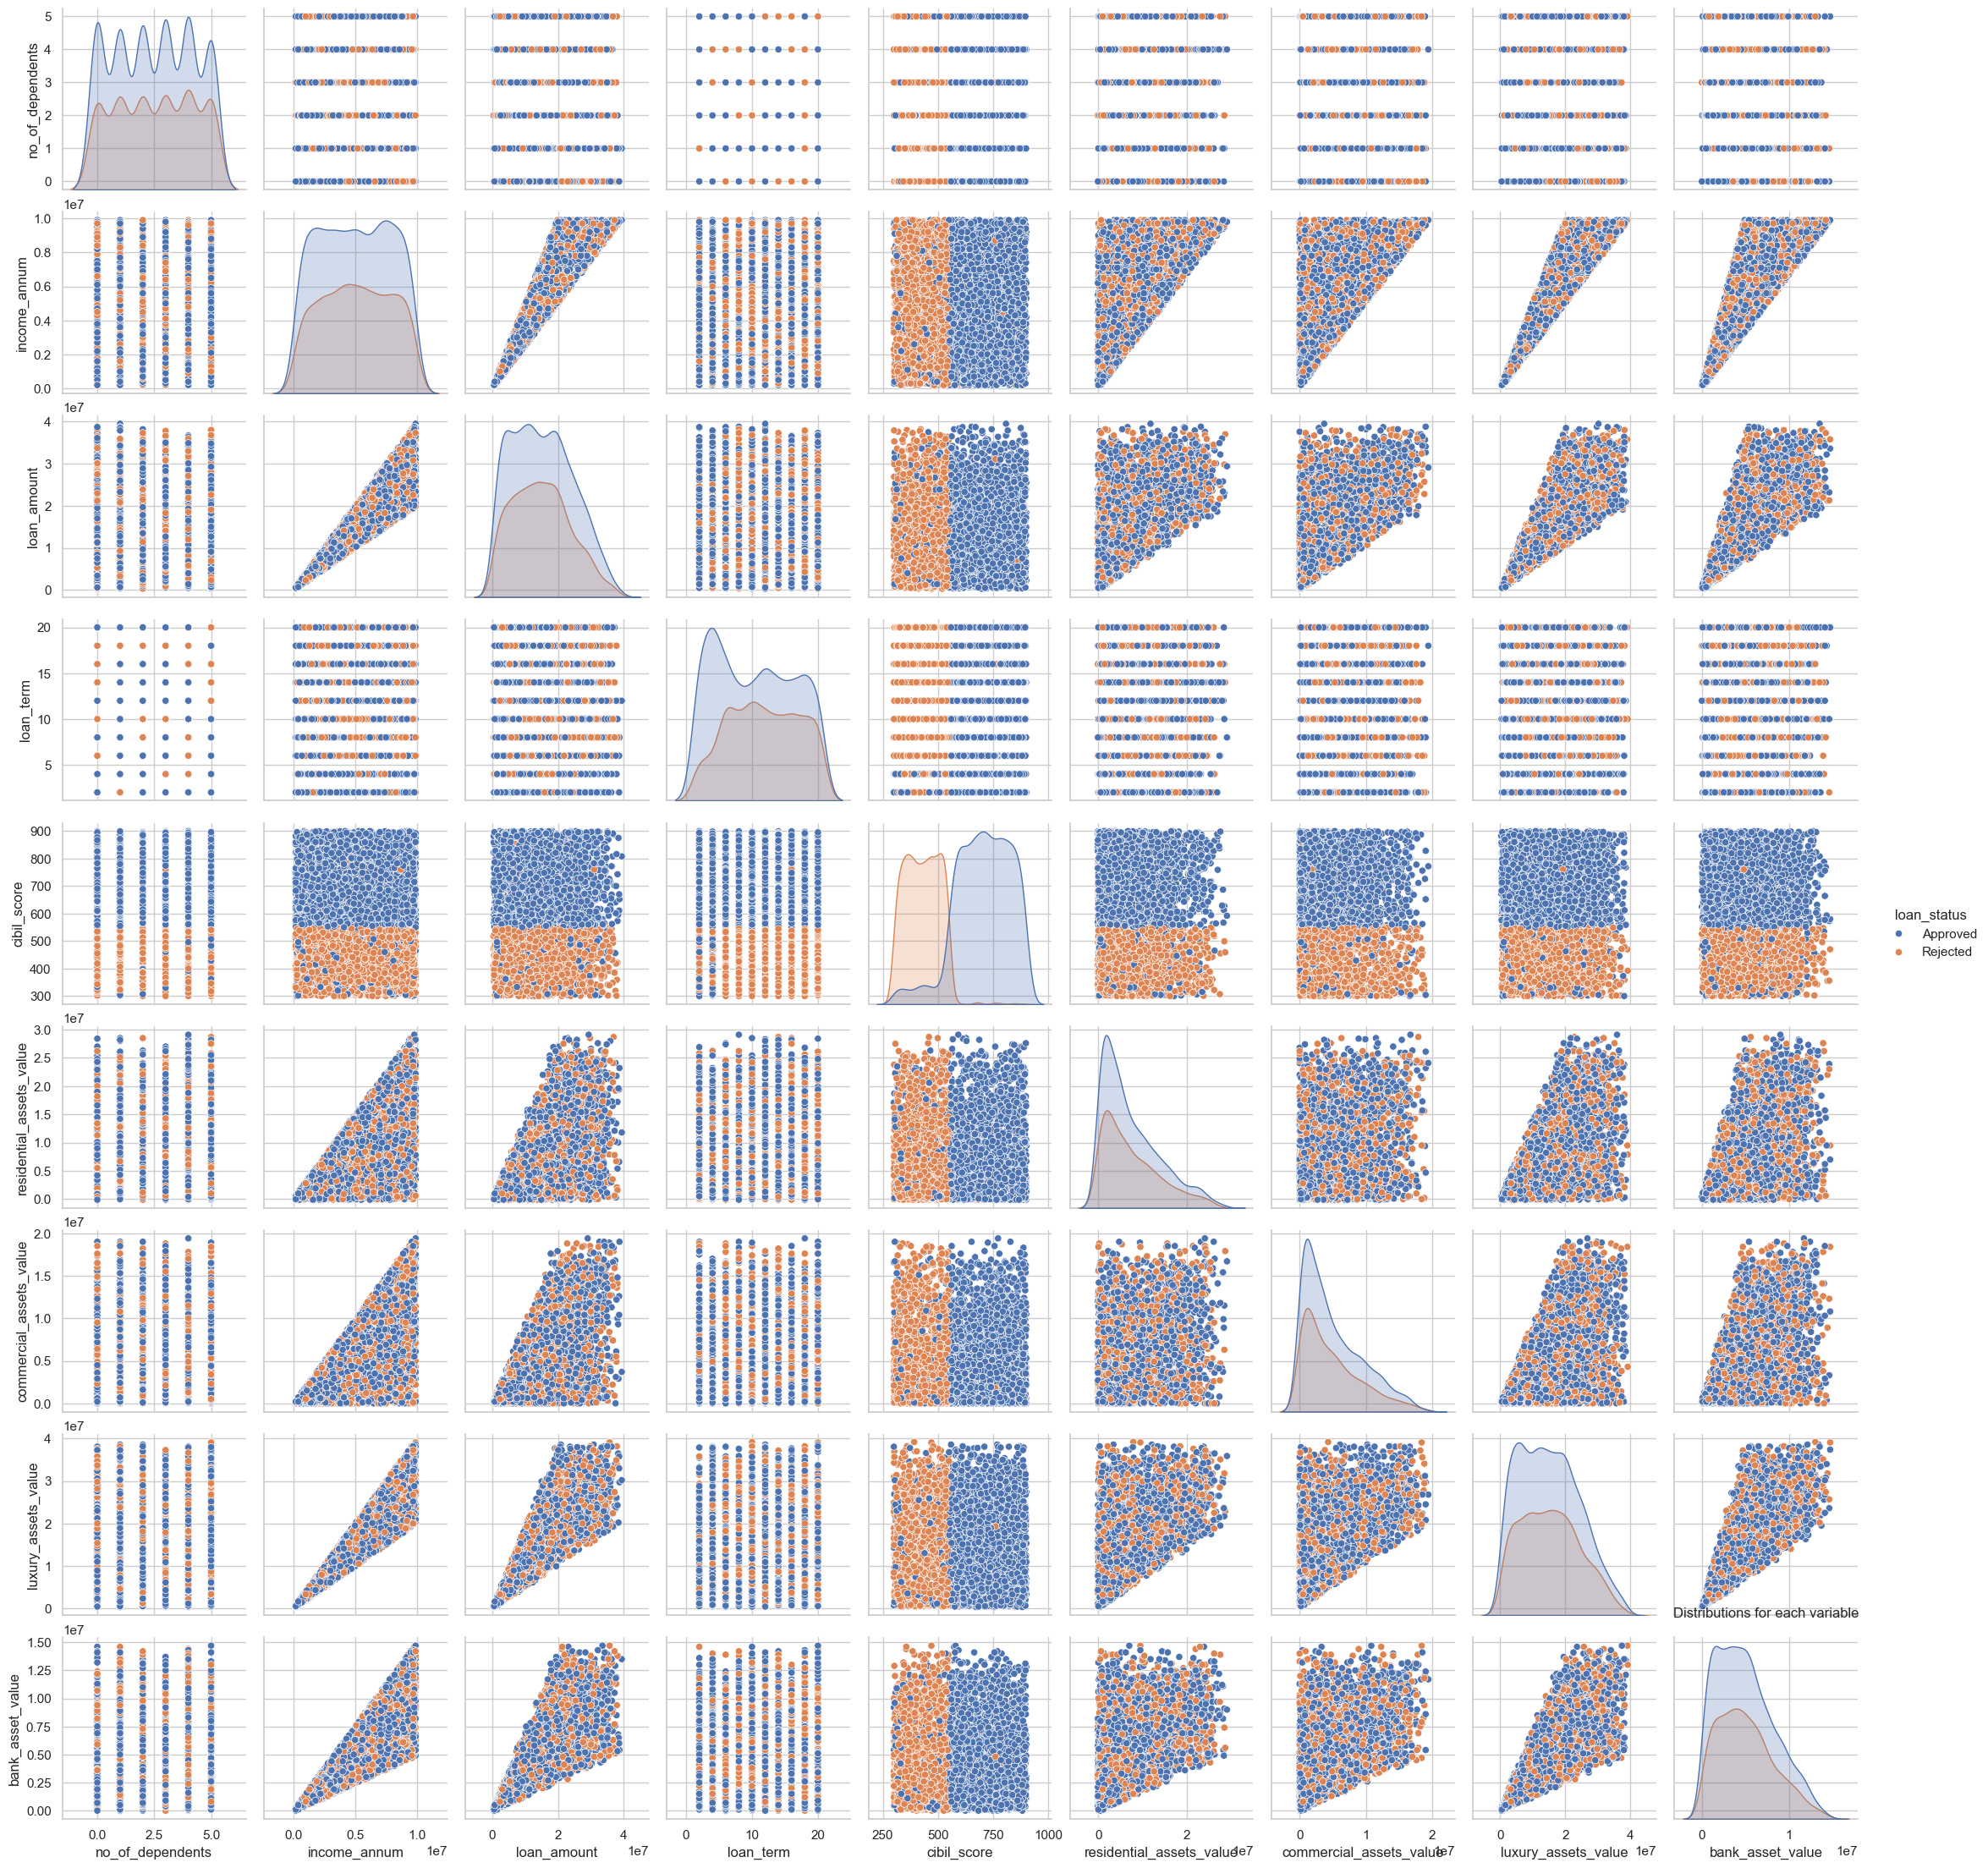

In [41]:
sns.pairplot(data = data, hue='loan_status')
plt.title('Distributions for each variable')
plt.show()

In [42]:
categorical_columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

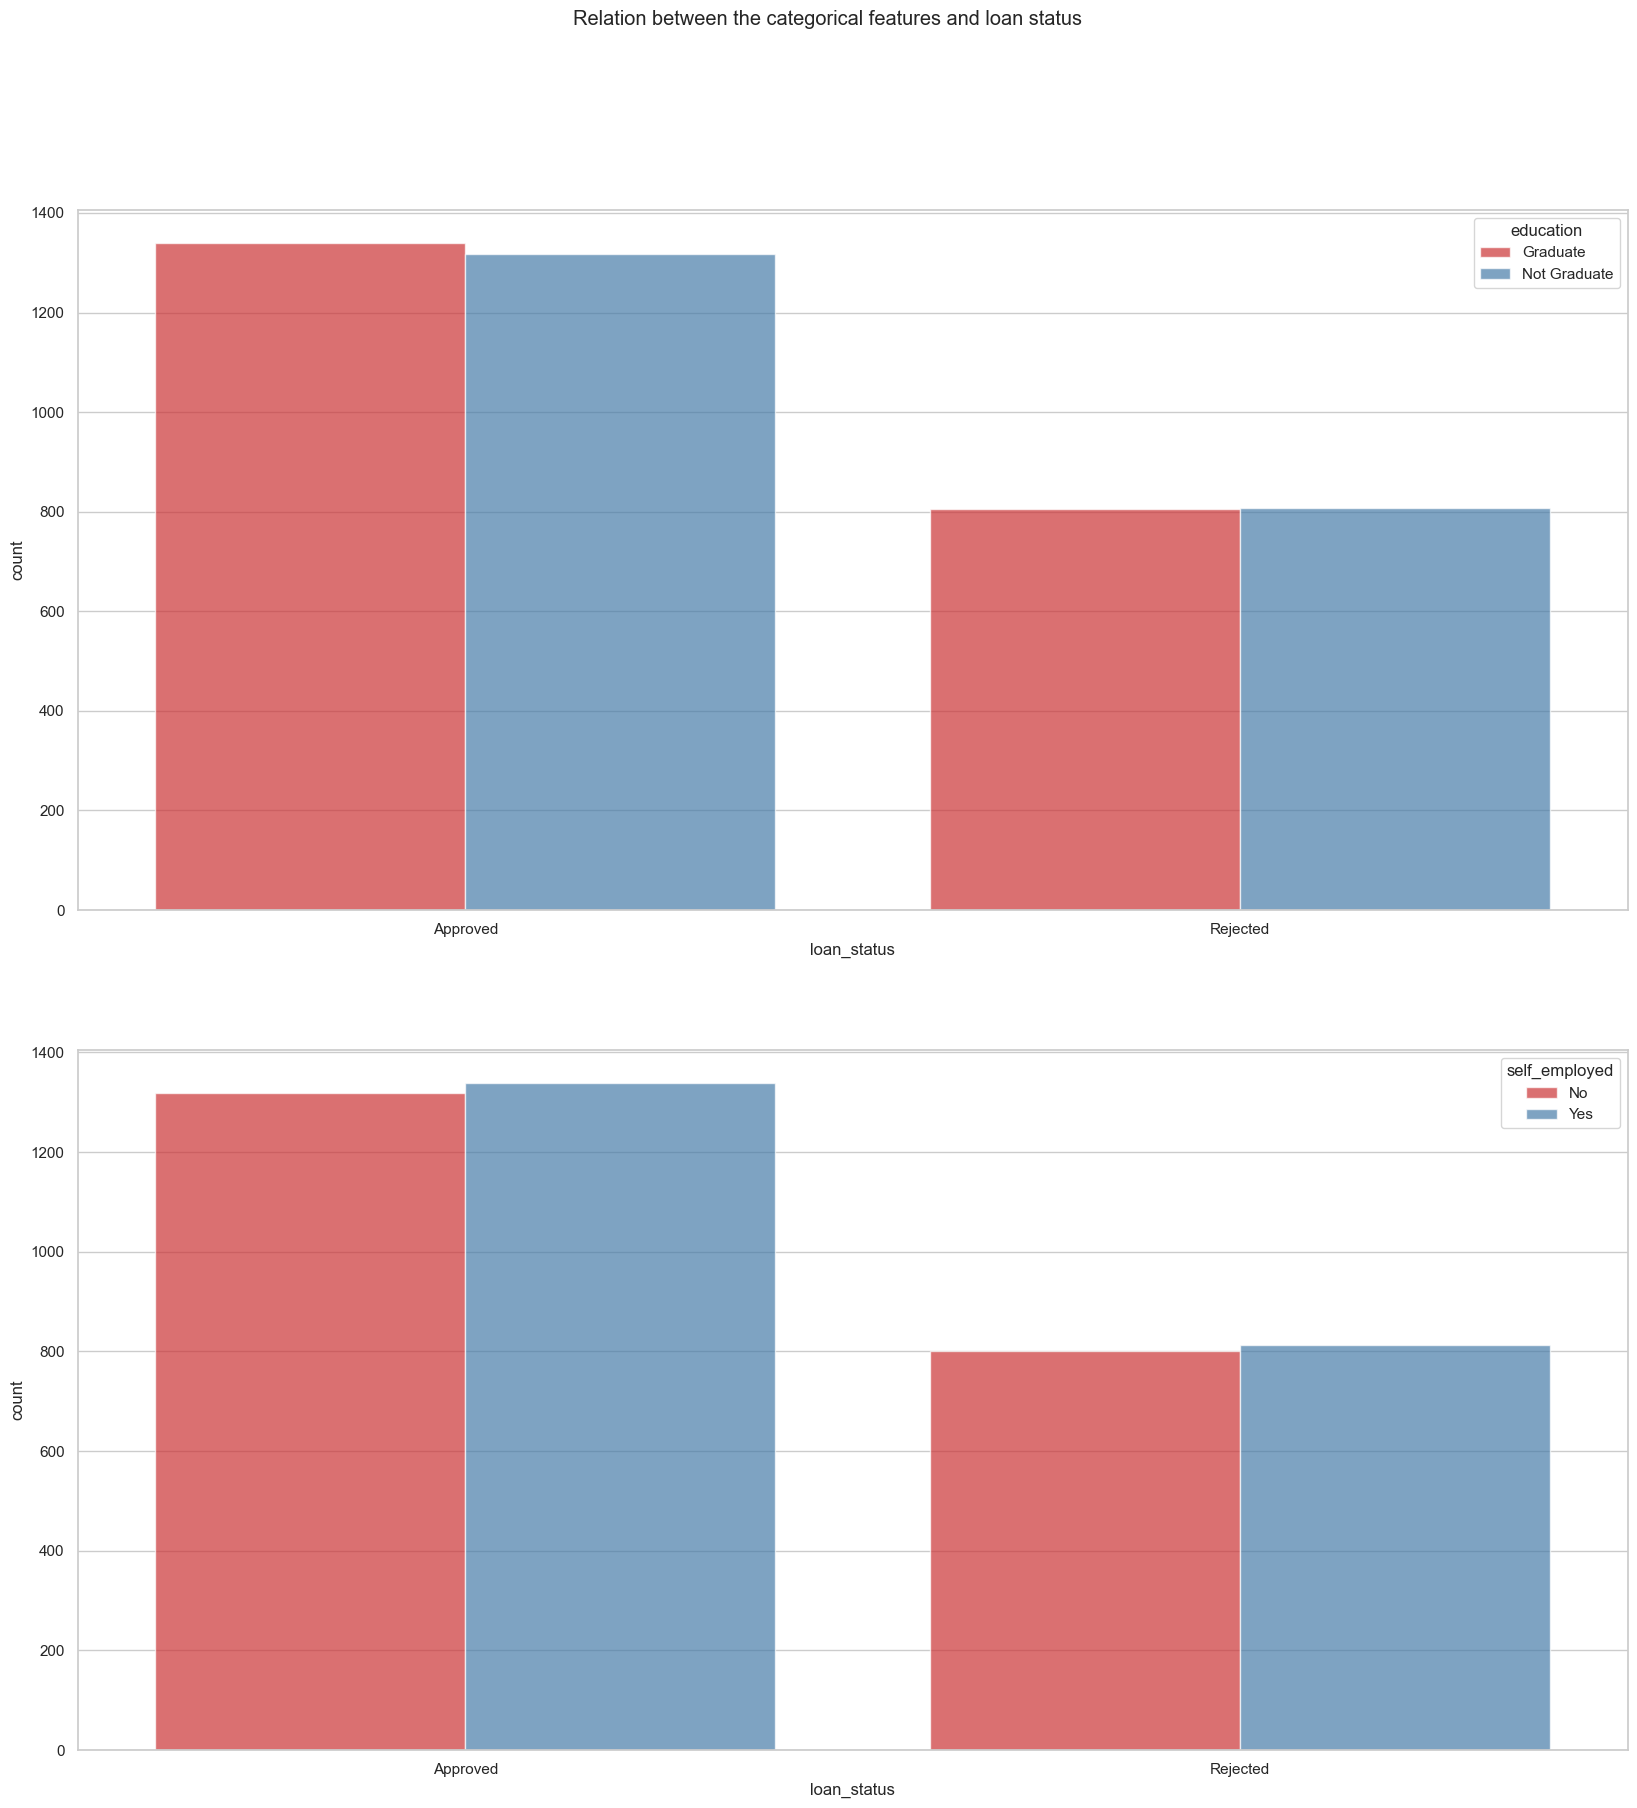

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and loan status')

categorical = ['education', 'self_employed']
for ax, i in enumerate(categorical):
    sns.countplot(x = 'loan_status', alpha = 0.7, hue = i, data = data, ax = axs[ax], palette = 'Set1')

# One Hot Encoding

In [44]:
data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [45]:
data[categorical_columns].head()

education self_employed loan_status
0      Graduate            No    Approved
1  Not Graduate           Yes    Rejected
2      Graduate            No    Rejected
3      Graduate            No    Rejected
4  Not Graduate           Yes    Rejected

In [46]:
for column in data[categorical_columns].drop('loan_status',axis=1).columns:
    data= pd.get_dummies(data, columns=[column], prefix = [column], drop_first=True)

In [47]:
data.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value loan_status  education_Not Graduate  self_employed_Yes  
0           8000000    Approved                   False              False  
1           3300000    Rejected                    True               True  
2          12800000    Rejected                   False              False  
3           7900000    Rejected                   False              False  
4           5000000    Rejected                    True               True

In [48]:
data = data.replace({True:1,False:0})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1017057720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True:1,False:0})


In [49]:
data['loan_status'] = data['loan_status'].replace({'Rejected':0,'Approved':1})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7108\1563156393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['loan_status'] = data['loan_status'].replace({'Rejected':0,'Approved':1})


In [50]:
data.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  loan_status  education_Not Graduate  self_employed_Yes  
0           8000000            1                       0                  0  
1           3300000            0                       1                  1  
2          12800000            0                       0                  0  
3           7900000            0                       0                  0  
4           5000000            0                       1                  1

# Feature Scaling

In [51]:
data.describe()

no_of_dependents  income_annum   loan_amount    loan_term  cibil_score  \
count       4269.000000  4.269000e+03  4.269000e+03  4269.000000  4269.000000   
mean           2.498712  5.059124e+06  1.513345e+07    10.900445   599.936051   
std            1.695910  2.806840e+06  9.043363e+06     5.709187   172.430401   
min            0.000000  2.000000e+05  3.000000e+05     2.000000   300.000000   
25%            1.000000  2.700000e+06  7.700000e+06     6.000000   453.000000   
50%            3.000000  5.100000e+06  1.450000e+07    10.000000   600.000000   
75%            4.000000  7.500000e+06  2.150000e+07    16.000000   748.000000   
max            5.000000  9.900000e+06  3.950000e+07    20.000000   900.000000   

       residential_assets_value  commercial_assets_value  luxury_assets_value  \
count              4.269000e+03             4.269000e+03         4.269000e+03   
mean               7.472617e+06             4.973155e+06         1.512631e+07   
std                6.503637e+06             4.388966e+06         9.103754e+06   
min               -1.000000e+05             0.000000e+00         3.000000e+05   
25%                2.200000e+06             1.300000e+06         7.500000e+06   
50%                5.600000e+06             3.700000e+06         1.460000e+07   
75%                1.130000e+07             7.600000e+06         2.170000e+07   
max                2.910000e+07             1.940000e+07         3.920000e+07   

       bank_asset_value  loan_status  education_Not Graduate  \
count      4.269000e+03  4269.000000             4269.000000   
mean       4.976692e+06     0.622160                0.497775   
std        3.250185e+06     0.484904                0.500054   
min        0.000000e+00     0.000000                0.000000   
25%        2.300000e+06     0.000000                0.000000   
50%        4.600000e+06     1.000000                0.000000   
75%        7.100000e+06     1.000000                1.000000   
max        1.470000e+07     1.000000                1.000000   

       self_employed_Yes  
count        4269.000000  
mean            0.503631  
std             0.500045  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             1.000000  
max             1.000000

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [54]:
data.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  loan_status  education_Not Graduate  self_employed_Yes  
0           8000000            1                       0                  0  
1           3300000            0                       1                  1  
2          12800000            0                       0                  0  
3           7900000            0                       0                  0  
4           5000000            0                       1                  1

In [55]:
scaler.fit(data.drop('loan_status',axis=1))

MinMaxScaler()

In [56]:
scaled_features = scaler.transform(data.drop('loan_status',axis=1))

In [57]:
scaled_features

array([[0.4       , 0.96907216, 0.75510204, ..., 0.54421769, 0.        ,
        0.        ],
       [0.        , 0.40206186, 0.30357143, ..., 0.2244898 , 1.        ,
        1.        ],
       [0.6       , 0.91752577, 0.75      , ..., 0.8707483 , 0.        ,
        0.        ],
       ...,
       [0.4       , 0.64948454, 0.60204082, ..., 0.49659864, 1.        ,
        0.        ],
       [0.2       , 0.40206186, 0.31887755, ..., 0.39455782, 1.        ,
        0.        ],
       [0.2       , 0.92783505, 0.75      , ..., 0.81632653, 0.        ,
        0.        ]])

In [58]:
data.columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'education_Not Graduate', 'self_employed_Yes'],
      dtype='object')

In [59]:
columns = data.columns.drop('loan_status')

In [60]:
columns

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'education_Not Graduate',
       'self_employed_Yes'],
      dtype='object')

In [61]:
data_scaled = pd.DataFrame(scaled_features, columns = columns)

In [62]:
data_scaled.head()

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0               0.4      0.969072     0.755102   0.555556     0.796667   
1               0.0      0.402062     0.303571   0.333333     0.195000   
2               0.6      0.917526     0.750000   1.000000     0.343333   
3               0.6      0.824742     0.775510   0.333333     0.278333   
4               1.0      0.989691     0.609694   1.000000     0.136667   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                  0.085616                 0.907216             0.575835   
1                  0.095890                 0.113402             0.218509   
2                  0.246575                 0.231959             0.848329   
3                  0.626712                 0.170103             0.591260   
4                  0.428082                 0.422680             0.748072   

   bank_asset_value  education_Not Graduate  self_employed_Yes  
0          0.544218                     0.0                0.0  
1          0.224490                     1.0                1.0  
2          0.870748                     0.0                0.0  
3          0.537415                     0.0                0.0  
4          0.340136                     1.0                1.0

# Handling Imbalance

In [63]:
from imblearn.combine import SMOTETomek
# from imblearn.under_sampling import NearMiss

In [64]:
X = data_scaled
y = data.loan_status

In [65]:
X

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                  0.4      0.969072     0.755102   0.555556     0.796667   
1                  0.0      0.402062     0.303571   0.333333     0.195000   
2                  0.6      0.917526     0.750000   1.000000     0.343333   
3                  0.6      0.824742     0.775510   0.333333     0.278333   
4                  1.0      0.989691     0.609694   1.000000     0.136667   
...                ...           ...          ...        ...          ...   
4264               1.0      0.082474     0.051020   0.555556     0.028333   
4265               0.0      0.319588     0.280612   1.000000     0.431667   
4266               0.4      0.649485     0.602041   0.888889     0.261667   
4267               0.2      0.402062     0.318878   0.333333     0.800000   
4268               0.2      0.927835     0.750000   0.444444     0.511667   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                     0.085616                 0.907216             0.575835   
1                     0.095890                 0.113402             0.218509   
2                     0.246575                 0.231959             0.848329   
3                     0.626712                 0.170103             0.591260   
4                     0.428082                 0.422680             0.748072   
...                        ...                      ...                  ...   
4264                  0.099315                 0.025773             0.077121   
4265                  0.147260                 0.149485             0.275064   
4266                  0.044521                 0.639175             0.457584   
4267                  0.284247                 0.036082             0.354756   
4268                  0.613014                 0.608247             0.910026   

      bank_asset_value  education_Not Graduate  self_employed_Yes  
0             0.544218                     0.0                0.0  
1             0.224490                     1.0                1.0  
2             0.870748                     0.0                0.0  
3             0.537415                     0.0                0.0  
4             0.340136                     1.0                1.0  
...                ...                     ...                ...  
4264          0.054422                     0.0                1.0  
4265          0.129252                     1.0                1.0  
4266          0.496599                     1.0                0.0  
4267          0.394558                     1.0                0.0  
4268          0.816327                     0.0                0.0  

[4269 rows x 11 columns]

In [66]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

In [67]:
# from imblearn.over_sampling import RandomOverSampler

In [68]:
#random_sampling = RandomOverSampler()
#X_sampled, y_sampled = random_sampling.fit_resample(X,y)

In [69]:
# Implementing Oversampling for Handling Imbalance
smk = SMOTETomek(random_state=42)
X_sampled, y_sampled = smk.fit_resample(X,y)

In [70]:
X_sampled.shape, y_sampled.shape

((5208, 11), (5208,))

In [71]:
from collections import Counter

In [72]:
print("Original Dataset shape {}".format(Counter(y)))
print("Resampled Dataset shape {}".format(Counter(y_sampled)))

Original Dataset shape Counter({1: 2656, 0: 1613})
Resampled Dataset shape Counter({1: 2604, 0: 2604})


(array([2604.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2604.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

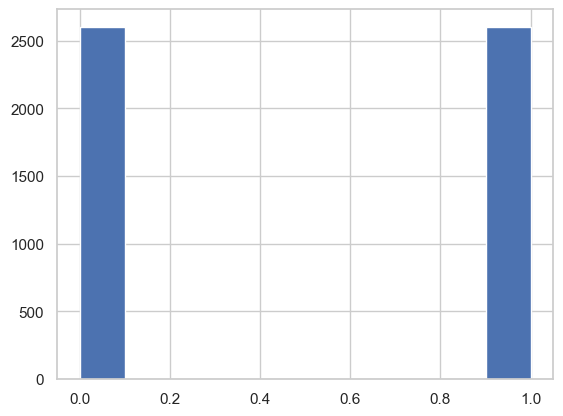

In [73]:
plt.hist(y_sampled)

# Model Training

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size = 0.20, random_state = 101, shuffle = True)

In [76]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4166, 11)
X_test shape: (1042, 11)
y_train shape: (4166,)
y_test shape: (1042,)


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [78]:
models={
    "Logistic_regression":LogisticRegression(),
    "Decision_tree":DecisionTreeClassifier(),
    "SVM":SVC(),
    "Random_forest_classifier":RandomForestClassifier(),
    "Gradient_Boosting_classifier":GradientBoostingClassifier(),
    "Naive_bayes":BernoulliNB(),
    "K_Neighbours_classifier":KNeighborsClassifier()
}

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score

In [80]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('*'*50)
    print(f'{model_name}:')
    print('accuracy :',(accuracy_score(y_test, y_pred)*100))
    print('confusion_matrix',confusion_matrix(y_test, y_pred))
    print('Precision',(precision_score(y_test, y_pred))*100)
    print('roc_auc_score: ',(roc_auc_score(y_test, y_pred))*100)
    print('f1_score',(f1_score(y_test, y_pred)*100))
    print("\n")

**************************************************
Logistic_regression:
accuracy : 93.95393474088291
confusion_matrix [[498  25]
 [ 38 481]]
Precision 95.0592885375494
roc_auc_score:  93.94905631877747
f1_score 93.85365853658536


**************************************************
Decision_tree:
accuracy : 98.17658349328215
confusion_matrix [[514   9]
 [ 10 509]]
Precision 98.26254826254826
roc_auc_score:  98.17618821310286
f1_score 98.16779170684667


**************************************************
SVM:
accuracy : 95.96928982725528
confusion_matrix [[511  12]
 [ 30 489]]
Precision 97.60479041916167
roc_auc_score:  95.96259905613456
f1_score 95.88235294117648


**************************************************
Random_forest_classifier:
accuracy : 98.75239923224568
confusion_matrix [[518   5]
 [  8 511]]
Precision 99.03100775193798
roc_auc_score:  98.75127561828342
f1_score 98.74396135265701


**************************************************
Gradient_Boosting_classifier:
accuracy 

In [82]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [83]:
y_pred = svm.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9596928982725528


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [86]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9596928982725528
Precision: 0.9760479041916168
Recall: 0.9421965317919075


In [87]:
# Saving the model to the disk
import pickle
with open("svm.pkl", "wb") as file:
    pickle.dump(svm, file)